Hello, my name is Artem. I'm going to review your project!

You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> "Improve" comments mean that there are tiny corrections that could help you to make your project better.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

### <font color='orange'>General feedback</font>
* Thank you for submitting your project! I am really impressed with it. 
* Glad to see that the notebook is structured. Keep it up!
* It was a pleasure to review your project.
* There is one thing that need to be done before your project is complete, but it's pretty straightforward.
* There are few things I'd like you to check. They're not mistakes, but your project could be improved if you correct them.
* I believe you can easily fix it! Good luck!

### <font color='orange'>General feedback (review 2)</font>
* All your hard work has paid off, and now your project is perfect!
* Keep up the good work. Good luck next!

# Exploratory Data Analysis

## Import Packages

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore

<div class="alert alert-block alert-success">
<b>Success:</b> Thank you for collecting all imports in the first cell!
</div>

## Import Data

In [2]:
taxi_name = pd.read_csv('/datasets/project_sql_result_01.csv')
display(taxi_name.head(5))
taxi_name.info()
display(taxi_name.describe())
taxi_dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')
display(taxi_dropoff.head(5))
taxi_dropoff.info()
display(taxi_dropoff.describe())

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


### Conclusions

From importing the data, we can see that each dataframe has two columns. The first column is a string variable while the second column is a numerical variable. 

The first dataframe shows us the number of trips each cab company had from November 15 to 16th in 2017. Looking at the summary statistics, we can see there are 64 cab companies with an average of 2,145 trips per company. The maximum number of trips a company had was 19,558 and the minimum number of trips a company had was 2. 

The second dataframe shows us the average number of trips each dropoff location had in November of 2017. Looking at the summary statistics, we can see there are 94 dropoff locations with an average of 600 trips per location. The maximum average number of trips a location had was 10,727.5 and the minimum average number of trips a location had was 1.8. 

<div class="alert alert-block alert-success">
<b>Success:</b> Data loading and initial analysis were done well!
</div>

## Graphing Data

<div class="alert alert-block alert-info">

<b>Improve: </b> You could use `.nlargest()` method here.
</div>

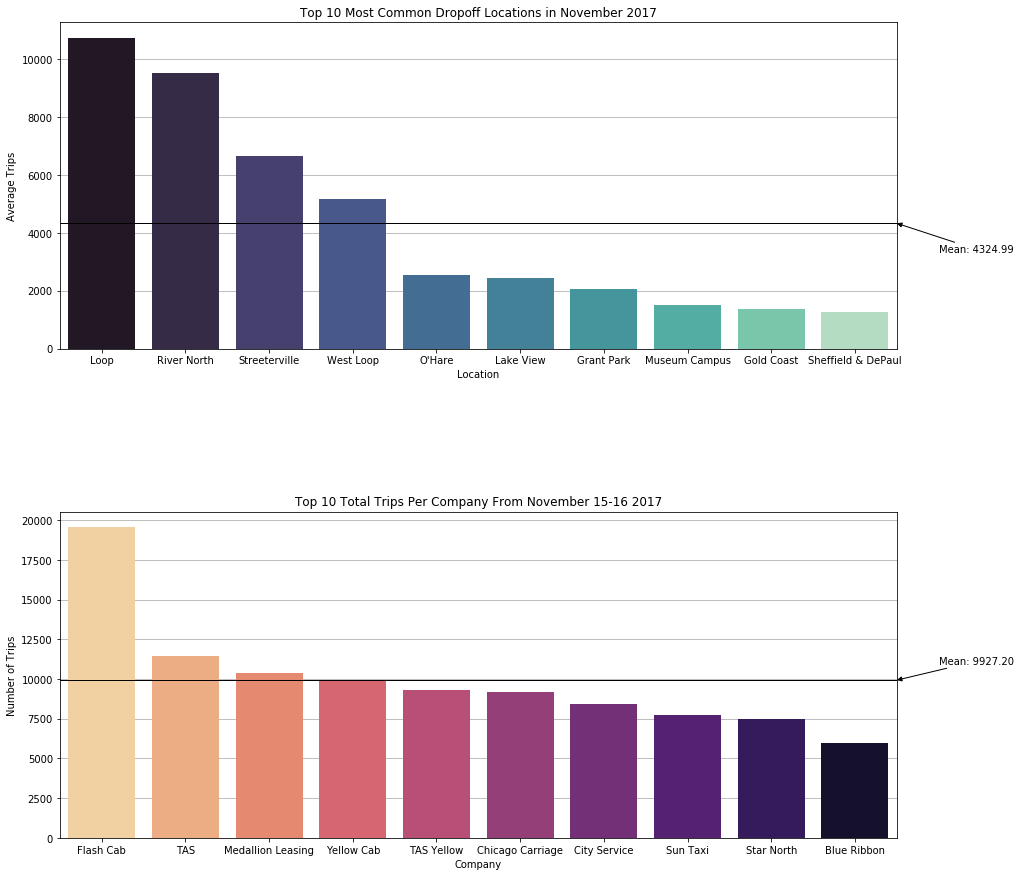

In [5]:
#making taxi cab company names shorter
taxi_name['company_name'].replace('Taxi Affiliation Service Yellow', 'TAS Yellow',inplace=True)
taxi_name['company_name'].replace('Taxi Affiliation Services', 'TAS',inplace=True)
taxi_name['company_name'].replace('Chicago Carriage Cab Corp', 'Chicago Carriage',inplace=True)
taxi_name['company_name'].replace('Star North Management LLC', 'Star North',inplace=True)
taxi_name['company_name'].replace('Blue Ribbon Taxi Association Inc.', 'Blue Ribbon',inplace=True)
#creating graph
fig, ax = plt.subplots(2,1,figsize=(15, 15))
#creating a boxplot for each Platform based on Total Sales
sns.barplot(ax=ax[0], x='dropoff_location_name', y='average_trips', data= taxi_dropoff.nlargest(10,'average_trips'),palette='mako');
ax[0].set_title('Top 10 Most Common Dropoff Locations in November 2017');
ax[0].set_ylabel('Average Trips');
ax[0].set_xlabel('Location');
#creating a bar graph for the average sales per year for each platform. Reindexed to match boxplot.
sns.barplot(ax=ax[1],x='company_name',y='trips_amount',data =taxi_name.nlargest(10,'trips_amount'),palette="magma_r");
ax[1].set_title('Top 10 Total Trips Per Company From November 15-16 2017');
ax[1].set_ylabel('Number of Trips');
ax[1].set_xlabel('Company');
#adding mean lines
mean_dropoff = taxi_dropoff.nlargest(10,'average_trips')['average_trips'].mean()
mean_name = taxi_name.nlargest(10,'trips_amount')['trips_amount'].mean()
mean_line_0 = ax[0].axhline(mean_dropoff, color='black', linewidth=1);
mean_line_1 = ax[1].axhline(mean_name, color='black', linewidth=1);
#adding arrow and mean value on the side
ax[0].annotate('Mean: {:0.2f}'.format(mean_dropoff),xy=(1,mean_dropoff), xycoords=('axes fraction','data'),xytext=(1.05,mean_dropoff-1000),arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='arc'))
ax[1].annotate('Mean: {:0.2f}'.format(mean_name),xy=(1,mean_name), xycoords=('axes fraction','data'),xytext=(1.05,mean_name+1000),arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='arc'))             
#adding y axis gridlines
ax[0].set_axisbelow(True);
ax[0].yaxis.grid(zorder=0);
ax[1].set_axisbelow(True);
ax[1].yaxis.grid(zorder=0);
#adding space betweeen the graphs
plt.subplots_adjust(hspace = 0.5);

### Conclusions

From the top graph, we can see there are a clear top 4 dropoff locations, Loop, River North, Streeterville, and West Loop. Each of the top four seem to have clear reasons for being at the top. The Loop in Chicago is the cities central business hub, so it is not surprising to see it as the most common dropoff location. River North and West Loop are known for their restaurants and art galleries and Streeterville is known for its shopping and beaches. <cite>[US News][1]</cite> 

For the bottom graph, we can see Flash Cab as the clear most popular cab company with the rest of the top 10 being fairly similar. Still, ff we had access to time varing data, I would expect all these companies are seeing large decreases in trips due to the rise of ride sharing. 

[1]: https://travel.usnews.com/Chicago_IL/Area_Map/

<div class="alert alert-block alert-success">
<b>Success:</b> Great visualization and analysis!
</div>

# Testing Hypotheses

## Importing Data

In [6]:
taxi_airport_trips = pd.read_csv('/datasets/project_sql_result_07.csv')
taxi_airport_trips.info()
display(taxi_airport_trips.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


Null Hypothesis: Saturdays with good weather and bad weather have the same lengths of taxi trips to the airport from the loop
Alternative Hypothesis: Saturdays with good weather and bad weather have different lengths of taxi trips to the airport from the loop


p-value:  6.517970327099473e-12


We reject the null hypothesis




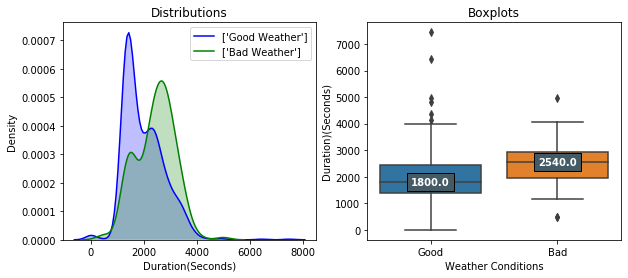

In [7]:
alpha = 0.05
fig, ax = plt.subplots(1,2,figsize=(10, 4))
#histograms of the density 
sns.kdeplot(ax=ax[0], data = taxi_airport_trips[taxi_airport_trips['weather_conditions'] == 'Good']['duration_seconds'], label = ['Good Weather'], shade=True, color='blue');
sns.kdeplot(ax=ax[0], data = taxi_airport_trips[taxi_airport_trips['weather_conditions'] == 'Bad']['duration_seconds'],label = ['Bad Weather'], shade=True, color ='green');
ax[0].set_title("Distributions");
ax[0].set_ylabel("Density");
ax[0].set_xlabel("Duration(Seconds)");
#boxplots 
box_plot = sns.boxplot(ax=ax[1], x='weather_conditions', y='duration_seconds', data=taxi_airport_trips)
ax[1].set_title("Boxplots");
ax[1].set_ylabel("Duration)(Seconds)");
ax[1].set_xlabel("Weather Conditions");
#adding the median values to the middle of the boxplots
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

#function to calculate the location of the median and design the format of the box with the median value in it.
for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 
#formatting of the median value box
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

#t-test 
results = stats.ttest_ind(taxi_airport_trips[taxi_airport_trips['weather_conditions'] == 'Good']['duration_seconds'],taxi_airport_trips[taxi_airport_trips['weather_conditions'] == 'Bad']['duration_seconds'],equal_var=True)
print('Null Hypothesis: Saturdays with good weather and bad weather have the same lengths of taxi trips to the airport from the loop')
print('Alternative Hypothesis: Saturdays with good weather and bad weather have different lengths of taxi trips to the airport from the loop')
print('\n')
#pull the p-value from the results
print('p-value: ', results.pvalue)
print('\n')
#compare the p-value to our alpha level
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 
print('\n')

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> Hypothesis were formulated incorrect because null hypothesis is always about equality.
</div>

<div class="alert alert-block alert-info">

<b>Improve: </b> It would be better if you've checked variances and selected `equal_var` (in ttest_ind) parameter based on this analysis
</div>

### Conclusions

From the above graphs, we can see that trips to the airport, on saturdays with bad weather, take longer than days with good weather. This is not surprising as people usually drive slower during bad weather. When running the t-test we can see that our p-vale is incredibly small, which gives us strong confidence that there is a difference in the length of taxi drives on saturdays from from the loop to the airport on bad and good weather days. 